# Problem 2 LOGISTIC REGRESSION

You are a statistician at the Republic of Indonesia Ministry of Health and you are provided with a data of 1473 females collected from a Contraceptive Prevalence Survey. The samples are married women who were either not pregnant or do not know if they were at the time of the survey.

The problem is to predict do/don't they use a contraceptive method of choice based on their demographic and socio-economic characteristics.

Dataset for Problem : Contraceptive_method_dataset.xlsx

Data Dictionary:

Wife's age (numerical)

Wife's education (categorical) 1=uneducated, 2, 3, 4=tertiary

Husband's education (categorical) 1=uneducated, 2, 3, 4=tertiary

Number of children ever born (numerical)

Wife's religion (binary) Non-Scientology, Scientology

Wife's now working? (binary) Yes, No

Husband's occupation (categorical) 1, 2, 3, 4(random)

Standard-of-living index (categorical) 1=verlow, 2, 3, 4=high

Media exposure (binary) Good, Not good

Contraceptive method used (class attribute) No,Yes

In [74]:
import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

# 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, check for duplicates and outliers and write an inference on it. Perform Univariate and Bivariate Analysis and Multivariate Analysis.

In [75]:
data2=pd.read_excel('C:\\Users\\baba\\Downloads\\edge downloads\\predictive modelling\\Contraceptive_method_dataset.xlsx')
data2.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No


In [76]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [77]:
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
Wife_age,1402.0,32.606277,8.274927,16.0,26.0,32.0,39.0,49.0
No_of_children_born,1452.0,3.254132,2.365212,0.0,1.0,3.0,4.0,16.0
Husband_Occupation,1473.0,2.137814,0.864857,1.0,1.0,2.0,3.0,4.0


In [78]:
data2.isna().sum()

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [79]:
dups = data2.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(data2.shape)

Number of duplicate rows = 80
(1473, 10)


In [80]:
data2.drop_duplicates(inplace=True)

In [81]:
dups = data2.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(data2.shape)

Number of duplicate rows = 0
(1393, 10)


In [82]:
data2.isna().sum()

Wife_age                     67
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [83]:
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
Wife_age,1326.0,32.557315,8.289259,16.0,26.0,32.0,39.0,49.0
No_of_children_born,1372.0,3.290816,2.399697,0.0,1.0,3.0,5.0,16.0
Husband_Occupation,1393.0,2.174444,0.854590,1.0,1.0,2.0,3.0,4.0


In [84]:
data2["Wife_age"].fillna(data2['Wife_age'].median(),inplace=True)
data2["No_of_children_born"].fillna(data2['No_of_children_born'].median(),inplace=True)

In [85]:
data2.isna().sum()

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

In [86]:
for feature in data2.columns: 
    if data2[feature].dtype == 'object': 
        print(feature)
        print(data2[feature].value_counts())
        print('\n')

Wife_ education
Tertiary      515
Secondary     398
Primary       330
Uneducated    150
Name: Wife_ education, dtype: int64


Husband_education
Tertiary      827
Secondary     347
Primary       175
Uneducated     44
Name: Husband_education, dtype: int64


Wife_religion
Scientology        1186
Non-Scientology     207
Name: Wife_religion, dtype: int64


Wife_Working
No     1043
Yes     350
Name: Wife_Working, dtype: int64


Standard_of_living_index
Very High    618
High         419
Low          227
Very Low     129
Name: Standard_of_living_index, dtype: int64


Media_exposure 
Exposed        1284
Not-Exposed     109
Name: Media_exposure , dtype: int64


Contraceptive_method_used
Yes    779
No     614
Name: Contraceptive_method_used, dtype: int64




In [87]:
data2.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')

In descriptive statistics, a box plot or boxplot (also known as box and whisker plot) is a type of chart often used in explanatory data analysis. Box plots visually show the distribution of numerical data and skewness through displaying the data quartiles (or percentiles) and averages.
Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.

<AxesSubplot:>

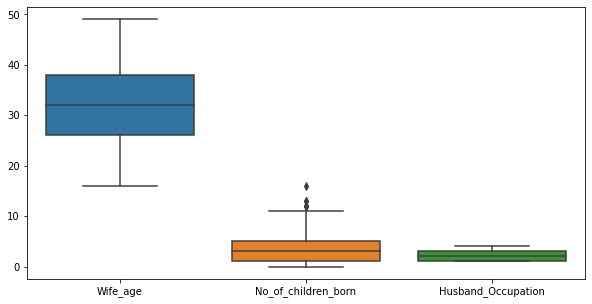

In [88]:
sns.boxplot(data=data2)

# Checking for Correlations.

A correlation coefficient is a statistical measure of the degree to which changes to the value of one variable predict change to the value of another. In positively correlated variables, the value increases or decreases in tandem.
correlation coefficients are used to assess the strength and direction of the linear relationships between pairs of variables. When both variables are normally distributed use Pearson's correlation coefficient, otherwise use Spearman's correlation coefficient.

In [89]:
# Checking for Correlations. Print the correlation matrix and the correlation heatmap
data2.corr()

,Wife_age,No_of_children_born,Husband_Occupation
Wife_age,1.000000,0.528428,-0.187070
No_of_children_born,0.528428,1.000000,-0.024213
Husband_Occupation,-0.187070,-0.024213,1.000000


A heat map is a two-dimensional representation of data in which values are represented by colors. A simple heat map provides an immediate visual summary of information. More elaborate heat maps allow the viewer to understand complex data sets.
Heat Maps are graphical representations of data that utilize color-coded systems. The primary purpose of Heat Maps is to better visualize the volume of locations/events within a dataset and assist in directing viewers towards areas on data visualizations that matter most.

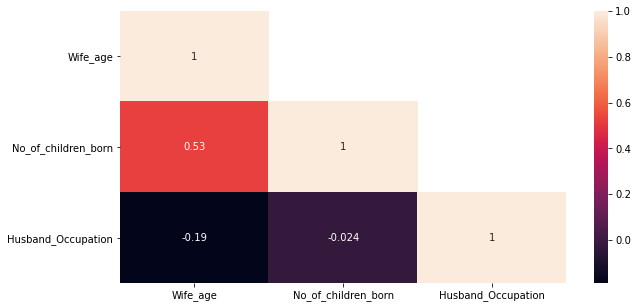

In [90]:
sns.heatmap(data2.corr(), annot=True,mask=np.triu(data2.corr(),+1));

# Pairplot using sns

Plot pairwise relationships in a dataset. By default, this function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column.

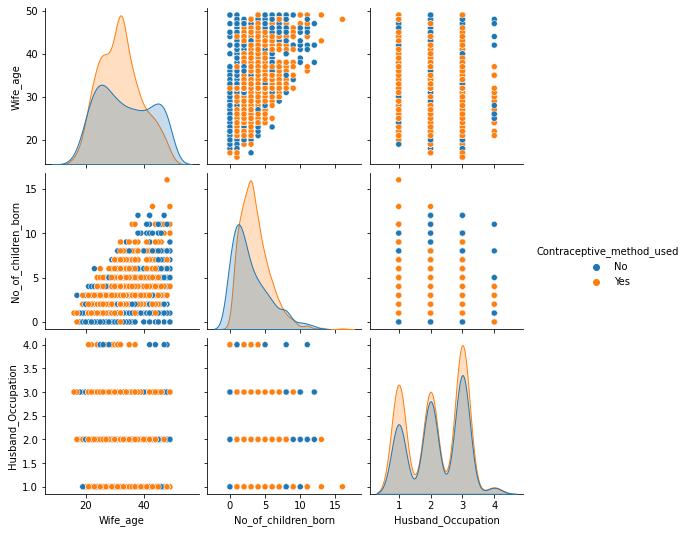

In [91]:
#Plot a series of scatterplots between the continuous independent variables keeping the target variable as a hue.
sns.pairplot(data2,diag_kind='kde' ,hue='Contraceptive_method_used');

# Univariate Analysis

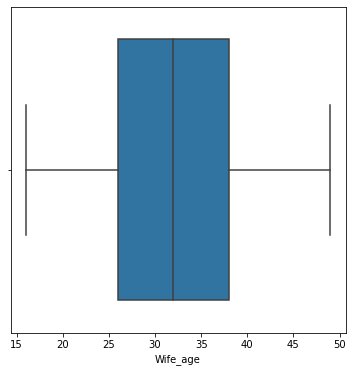

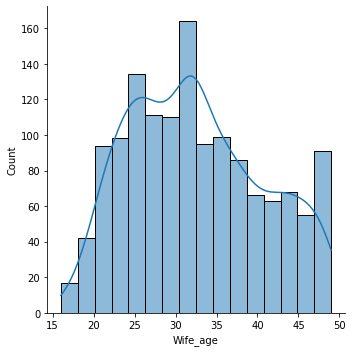

In [92]:
plt.figure(figsize=(6,6))
sns.boxplot(data=data2, x='Wife_age')

sns.displot(data=data2, x='Wife_age', kde=True)


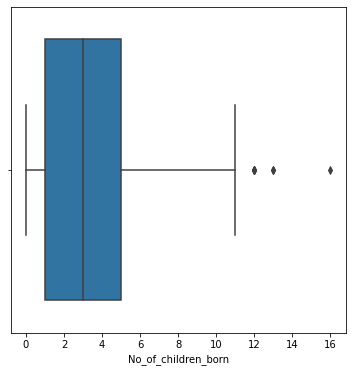

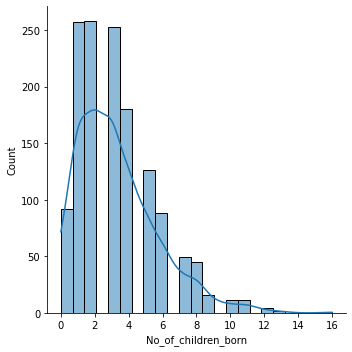

In [93]:
plt.figure(figsize=(6,6))
sns.boxplot(data=data2, x='No_of_children_born')

sns.displot(data=data2, x='No_of_children_born', kde=True)


Figure 3 shows the wife_age of the data-set spanning from around 16 years to almost 50 years. The middle 50% of the wife_age resides between 26 age to 39 age as can be seen from the box plot. The histogram clearly shows the right skewness of the data-set. Also, the highest proportion of records has wife_age between ~25 to ~37 years as shown in the histogram.

 Figure 4 clearly evident from the box plot that the middle 50% of children count ranges from 1 to 4. Also, the histogram shows the right skewness of the children count in the data-set.

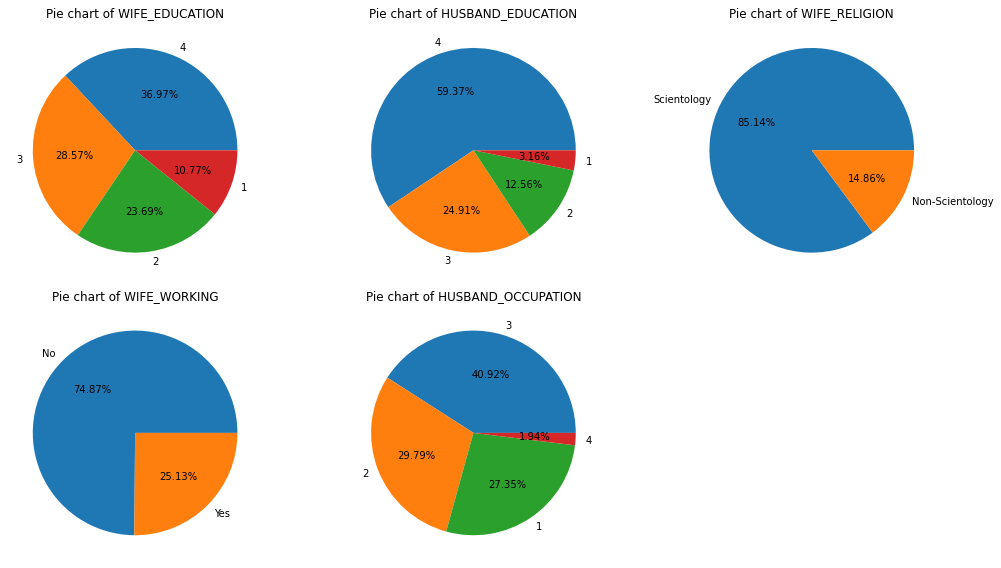

In [107]:
cat_vars = ['Wife_education', 'Husband_education', 'Wife_religion', 'Wife_Working', 'Husband_Occupation','Standard_of_living_index','Media_exposure','Contraceptive_method_used']
plt.figure(figsize = (15,8))
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.pie(data2[cat_vars[i]].value_counts(), labels= data2[cat_vars[i]].value_counts().index, 
            autopct = '%0.2f%%')
    plt.title("Pie chart of "+cat_vars[i].upper())
    plt.tight_layout();

the above pie chats are based on the value counts which are carried out in the question 2.2

# 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and build multiple models with different predictors.

In [95]:
data2.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')

# Change the names of the variables in a suitable way for building the logistic regression model

In [96]:
data2.rename(columns = {'Wife_ education':'Wife_education'}, inplace = True)
data2.rename(columns = {'Media_exposure ':'Media_exposure'}, inplace = True)

The value_counts() function is used to get a Series containing counts of unique values.

The resulting object will be in descending order so that the first element is the most frequently-occurring element.

# value_counts()

In [97]:
data2['Wife_education'] = data2['Wife_education'].replace({"Uneducated":1, "Primary":2, "Secondary":3, "Tertiary":4})
data2['Wife_education'].value_counts()

4    515
3    398
2    330
1    150
Name: Wife_education, dtype: int64

In [98]:
data2['Husband_education'] = data2['Husband_education'].replace({"Uneducated":1, "Primary":2, "Secondary":3, "Tertiary":4})
data2['Husband_education'].value_counts()

4    827
3    347
2    175
1     44
Name: Husband_education, dtype: int64

In [99]:
data2['Standard_of_living_index'] = data2['Standard_of_living_index'].replace({"Very Low":1, "Low":2, "High":3, "Very High":4})
data2['Standard_of_living_index'].value_counts()

4    618
3    419
2    227
1    129
Name: Standard_of_living_index, dtype: int64

In [100]:
data2['Media_exposure'] = data2['Media_exposure'].replace({'Exposed':'Good','Not-Exposed':'Not_good'})
data2['Media_exposure'].value_counts()

Good        1284
Not_good     109
Name: Media_exposure, dtype: int64

In [101]:
data2['Media_exposure'] = data2['Media_exposure'].replace({'Exposed':'Good','Not-Exposed':'Not_good'})
data2['Media_exposure'].value_counts()

Good        1284
Not_good     109
Name: Media_exposure, dtype: int64

# Convert categorical variable into dummy/indicator variables. 

In [102]:
data2_dummy = pd.get_dummies(data2, drop_first=True)

In [103]:
data2_dummy.head()

,Wife_age,Wife_education,Husband_education,No_of_children_born,Husband_Occupation,Standard_of_living_index,Wife_religion_Scientology,Wife_Working_Yes,Media_exposure_Not_good,Contraceptive_method_used_Yes
0,24.0,2,3,3.0,2,3,1,0,0,0
1,45.0,1,3,10.0,3,4,1,0,0,0
2,43.0,2,3,7.0,3,4,1,0,0,0
3,42.0,3,2,9.0,3,3,1,0,0,0
4,36.0,3,3,8.0,3,2,1,0,0,0


In [104]:
data2_dummy.shape

(1393, 10)

In [105]:
data2_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Wife_age                       1393 non-null   float64
 1   Wife_education                 1393 non-null   int64  
 2   Husband_education              1393 non-null   int64  
 3   No_of_children_born            1393 non-null   float64
 4   Husband_Occupation             1393 non-null   int64  
 5   Standard_of_living_index       1393 non-null   int64  
 6   Wife_religion_Scientology      1393 non-null   uint8  
 7   Wife_Working_Yes               1393 non-null   uint8  
 8   Media_exposure_Not_good        1393 non-null   uint8  
 9   Contraceptive_method_used_Yes  1393 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 81.6 KB


# Using stat model

In [106]:
import statsmodels.formula.api as sm

In [108]:
data2_dummy.columns

Index(['Wife_age', 'Wife_education', 'Husband_education',
       'No_of_children_born', 'Husband_Occupation', 'Standard_of_living_index',
       'Wife_religion_Scientology', 'Wife_Working_Yes',
       'Media_exposure_Not_good', 'Contraceptive_method_used_Yes'],
      dtype='object')

summing up the coloumns for the model preparation 

In [109]:
'+'.join(data2_dummy.columns)

'Wife_age+Wife_education+Husband_education+No_of_children_born+Husband_Occupation+Standard_of_living_index+Wife_religion_Scientology+Wife_Working_Yes+Media_exposure_Not_good+Contraceptive_method_used_Yes'

# Model_1

In [110]:
formula_1='Contraceptive_method_used_Yes~Wife_age+Wife_education+Husband_education+No_of_children_born+Husband_Occupation+Standard_of_living_index+Wife_religion_Scientology+Wife_Working_Yes+Media_exposure_Not_good'

In [111]:
Logistic_1 = sm.logit(formula=formula_1,data=data2_dummy).fit()

Optimization terminated successfully.
         Current function value: 0.611067
         Iterations 5


In [112]:
Logistic_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Logit Regression Results                                
=========================================================================================
Dep. Variable:     Contraceptive_method_used_Yes   No. Observations:                 1393
Model:                                     Logit   Df Residuals:                     1383
Method:                                      MLE   Df Model:                            9
Date:                           Thu, 01 Dec 2022   Pseudo R-squ.:                  0.1094
Time:                                   00:50:15   Log-Likelihood:                -851.22
converged:                                  True   LL-Null:                       -955.76
Covariance Type:                       nonrobust   LLR p-value:                 4.115e-40
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.4274      0.555     -0.770      0.441      -1.516       0.661
Wife_age                     -0.0771      0.010     -7.990      0.000      -0.096      -0.058
Wife_education                0.5112      0.080      6.389      0.000       0.354       0.668
Husband_education             0.0165      0.092      0.179      0.858      -0.164       0.197
No_of_children_born           0.3165      0.034      9.333      0.000       0.250       0.383
Husband_Occupation            0.1138      0.077      1.475      0.140      -0.037       0.265
Standard_of_living_index      0.2403      0.067      3.583      0.000       0.109       0.372
Wife_religion_Scientology    -0.3797      0.174     -2.176      0.030      -0.722      -0.038
Wife_Working_Yes             -0.1350      0.135     -0.998      0.318      -0.400       0.130
Media_exposure_Not_good      -0.4623      0.246     -1.881      0.060      -0.944       0.019
=============================================================================================
"""

In [113]:
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [114]:
vif_cal(input_data=data2_dummy[['Wife_age', 'Wife_education', 'Husband_education',
       'No_of_children_born', 'Husband_Occupation', 'Standard_of_living_index',
       'Wife_religion_Scientology', 'Wife_Working_Yes',
       'Media_exposure_Not_good']])

Wife_age  VIF =  1.58
Wife_education  VIF =  1.85
Husband_education  VIF =  1.7
No_of_children_born  VIF =  1.51
Husband_Occupation  VIF =  1.26
Standard_of_living_index  VIF =  1.29
Wife_religion_Scientology  VIF =  1.12
Wife_Working_Yes  VIF =  1.03
Media_exposure_Not_good  VIF =  1.18


Preparing the regression models based on variance inflaction factor

A variance inflation factor (VIF) provides a measure of multicollinearity among the independent variables in a multiple regression model.

Detecting multicollinearity is important because while multicollinearity does not reduce the explanatory power of the model, it does reduce the statistical significance of the independent variables. 

A large VIF on an independent variable indicates a highly collinear relationship to the other variables that should be considered or adjusted for in the structure of the model and selection of independent variables.

In [115]:
print('The adjusted pseudo R-square value is',1 - ((Logistic_1.llf - Logistic_1.df_model)/Logistic_1.llnull))

The adjusted pseudo R-square value is 0.09996487208682903


# Model 2
# Model without the 'Husband_education' variable

In [116]:
formula_2 = 'Contraceptive_method_used_Yes ~ Wife_age + Wife_education + No_of_children_born + Husband_Occupation + Standard_of_living_index + Wife_religion_Scientology + Wife_Working_Yes + Media_exposure_Not_good'

In [117]:
Logistic_2 = sm.logit(formula=formula_2,data=data2_dummy).fit()
Logistic_2.summary()

Optimization terminated successfully.
         Current function value: 0.611079
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Logit Regression Results                                
=========================================================================================
Dep. Variable:     Contraceptive_method_used_Yes   No. Observations:                 1393
Model:                                     Logit   Df Residuals:                     1384
Method:                                      MLE   Df Model:                            8
Date:                           Thu, 01 Dec 2022   Pseudo R-squ.:                  0.1094
Time:                                   00:50:17   Log-Likelihood:                -851.23
converged:                                  True   LL-Null:                       -955.76
Covariance Type:                       nonrobust   LLR p-value:                 7.885e-41
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.3881      0.510     -0.761      0.446      -1.387       0.611
Wife_age                     -0.0772      0.010     -7.995      0.000      -0.096      -0.058
Wife_education                0.5176      0.072      7.225      0.000       0.377       0.658
No_of_children_born           0.3160      0.034      9.348      0.000       0.250       0.382
Husband_Occupation            0.1122      0.077      1.464      0.143      -0.038       0.262
Standard_of_living_index      0.2422      0.066      3.656      0.000       0.112       0.372
Wife_religion_Scientology    -0.3807      0.174     -2.183      0.029      -0.723      -0.039
Wife_Working_Yes             -0.1366      0.135     -1.012      0.312      -0.401       0.128
Media_exposure_Not_good      -0.4658      0.245     -1.901      0.057      -0.946       0.014
=============================================================================================
"""

Adjusted R2 is a corrected goodness-of-fit (model accuracy) measure for linear models. It identifies the percentage of variance in the target field that is explained by the input or inputs.

R2 tends to optimistically estimate the fit of the linear regression. It always increases as the number of effects are included in the model. Adjusted R2 attempts to correct for this overestimation. Adjusted R2 might decrease if a specific effect does not improve the model.

Adjusted R squared is calculated by dividing the residual mean square error by the total mean square error (which is the sample variance of the target field). The result is then subtracted from 1.

Adjusted R 2 isalways less than or equal to R2. A value of 1 indicates a model that perfectly predicts values in the target field. A value that is less than or equal to 0 indicates a model that has no predictive value. In the real world, adjusted R2lies between these values.

In [118]:
print('The adjusted pseudo R-square value is',1 - ((Logistic_2.llf - Logistic_2.df_model)/Logistic_2.llnull))

The adjusted pseudo R-square value is 0.10099445742155944


# Model 3
# Model without the 'Wife_Working_Yes' variable

In [119]:
formula_3 = 'Contraceptive_method_used_Yes ~ Wife_age + Wife_education + No_of_children_born + Husband_Occupation + Standard_of_living_index + Wife_religion_Scientology + Media_exposure_Not_good '

In [120]:
Logistic_3 = sm.logit(formula=formula_3,data=data2_dummy).fit()
Logistic_3.summary()

Optimization terminated successfully.
         Current function value: 0.611446
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Logit Regression Results                                
=========================================================================================
Dep. Variable:     Contraceptive_method_used_Yes   No. Observations:                 1393
Model:                                     Logit   Df Residuals:                     1385
Method:                                      MLE   Df Model:                            7
Date:                           Thu, 01 Dec 2022   Pseudo R-squ.:                  0.1088
Time:                                   00:50:19   Log-Likelihood:                -851.74
converged:                                  True   LL-Null:                       -955.76
Covariance Type:                       nonrobust   LLR p-value:                 2.283e-41
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.3876      0.509     -0.761      0.447      -1.386       0.611
Wife_age                     -0.0779      0.010     -8.095      0.000      -0.097      -0.059
Wife_education                0.5150      0.072      7.201      0.000       0.375       0.655
No_of_children_born           0.3199      0.034      9.511      0.000       0.254       0.386
Husband_Occupation            0.1104      0.077      1.442      0.149      -0.040       0.260
Standard_of_living_index      0.2381      0.066      3.603      0.000       0.109       0.368
Wife_religion_Scientology    -0.3799      0.174     -2.179      0.029      -0.722      -0.038
Media_exposure_Not_good      -0.4759      0.245     -1.942      0.052      -0.956       0.004
=============================================================================================
"""

# Model 4
# Model without the 'Husband_Occupation' variable

In [121]:
formula_4 = 'Contraceptive_method_used_Yes ~ Wife_age + Wife_education + No_of_children_born + Standard_of_living_index + Wife_religion_Scientology + Media_exposure_Not_good '

In [122]:
Logistic_4 = sm.logit(formula=formula_4,data=data2_dummy).fit()
Logistic_4.summary()

Optimization terminated successfully.
         Current function value: 0.612195
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Logit Regression Results                                
=========================================================================================
Dep. Variable:     Contraceptive_method_used_Yes   No. Observations:                 1393
Model:                                     Logit   Df Residuals:                     1386
Method:                                      MLE   Df Model:                            6
Date:                           Thu, 01 Dec 2022   Pseudo R-squ.:                  0.1077
Time:                                   00:50:19   Log-Likelihood:                -852.79
converged:                                  True   LL-Null:                       -955.76
Covariance Type:                       nonrobust   LLR p-value:                 1.030e-41
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.0733      0.397      0.185      0.853      -0.704       0.851
Wife_age                     -0.0800      0.010     -8.399      0.000      -0.099      -0.061
Wife_education                0.4808      0.067      7.158      0.000       0.349       0.612
No_of_children_born           0.3198      0.034      9.520      0.000       0.254       0.386
Standard_of_living_index      0.2248      0.065      3.439      0.001       0.097       0.353
Wife_religion_Scientology    -0.3940      0.174     -2.260      0.024      -0.736      -0.052
Media_exposure_Not_good      -0.4832      0.245     -1.971      0.049      -0.964      -0.003
=============================================================================================
"""

In [123]:
print('The adjusted pseudo R-square value is',1 - ((Logistic_4.llf - Logistic_4.df_model)/Logistic_4.llnull))

The adjusted pseudo R-square value is 0.10146027977898875


In [124]:
y_prob_pred_4 = Logistic_4.predict()
y_prob_pred_4

array([0.5879629 , 0.65903316, 0.58425517, ..., 0.46547131, 0.47298267,
       0.72736105])

<AxesSubplot:xlabel='Contraceptive_method_used_Yes'>

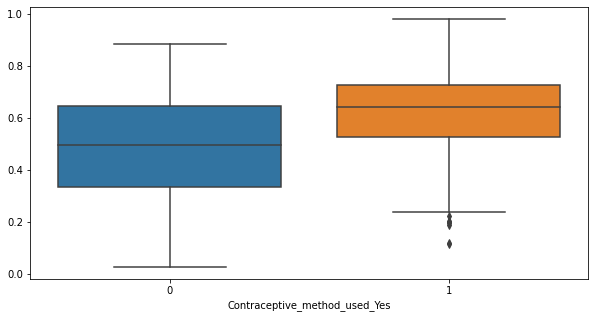

In [125]:
sns.boxplot(x=data2_dummy['Contraceptive_method_used_Yes'],y=y_prob_pred_4)

In [126]:
y_class_pred=(y_prob_pred_4>=0.5).astype(int)
y_class_pred

array([1, 1, 1, ..., 0, 0, 1])

In [127]:
from sklearn.model_selection import train_test_split

# spliting the data in the ratio of 70:30 

In [128]:
Train,Test = train_test_split(data2_dummy,test_size=0.3,random_state=1,stratify=data2_dummy['Contraceptive_method_used_Yes'])

In [129]:
Train.shape

(975, 10)

In [130]:
Test.shape

(418, 10)

In [131]:
Train['Contraceptive_method_used_Yes'].value_counts(1)

1    0.558974
0    0.441026
Name: Contraceptive_method_used_Yes, dtype: float64

In [132]:
Test['Contraceptive_method_used_Yes'].value_counts(1)

1    0.559809
0    0.440191
Name: Contraceptive_method_used_Yes, dtype: float64

In [133]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='newton-cg',penalty='none')
from sklearn import metrics

# Evaluating the model generated

In [134]:
model_sklearn_4 = lr.fit(Train[['Wife_age','Wife_education','No_of_children_born','Standard_of_living_index',
                            'Wife_religion_Scientology','Media_exposure_Not_good']],Train['Contraceptive_method_used_Yes'])

In [135]:
model_sklearn_4_pred_train = model_sklearn_4.predict(Train[['Wife_age','Wife_education','No_of_children_born','Standard_of_living_index',
                            'Wife_religion_Scientology','Media_exposure_Not_good']])

In [136]:
model_sklearn_4_pred_test = model_sklearn_4.predict(Test[['Wife_age','Wife_education','No_of_children_born','Standard_of_living_index',
                            'Wife_religion_Scientology','Media_exposure_Not_good']])

In [137]:
print('Accuracy Score - Model 4')
print('Training:', metrics.accuracy_score(Train['Contraceptive_method_used_Yes'],model_sklearn_4_pred_train))
print('Testing: ', metrics.accuracy_score(Test['Contraceptive_method_used_Yes'],model_sklearn_4_pred_test))

Accuracy Score - Model 4
Training: 0.6656410256410257
Testing:  0.6578947368421053


there is a slight differece due to variation the value counts in trained accuracy and tested accuracy depending on datc set provided 

# 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

In [138]:
from sklearn.metrics import ConfusionMatrixDisplay

In order to measure how well our classification model is doing at making these predictions, we use classification metrics. It measures the performance of our machine learning model, giving us the confidence that these outputs can be further used in decision-making processes.

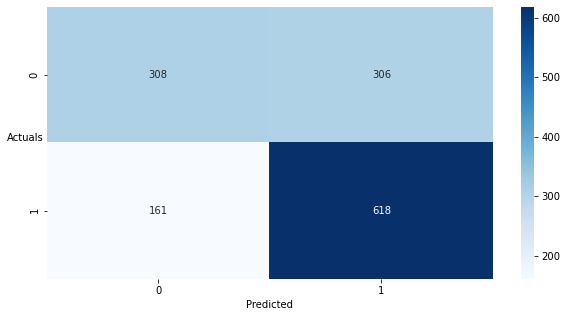

In [139]:
sns.heatmap((metrics.confusion_matrix(data2_dummy['Contraceptive_method_used_Yes'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals',rotation=0);

In [140]:
tn, fp, fn, tp = metrics.confusion_matrix(data2_dummy['Contraceptive_method_used_Yes'],y_class_pred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 308 
False Positives: 306 
False Negatives: 161 
True Positives: 618


# Accuracy check for the logistic regression model

We will start off with accuracy because it’s the one that’s typically used the most, especially for beginners. 

Accuracy is defined as the number of correct predictions over the total predictions:

In [141]:
print(metrics.classification_report(data2_dummy['Contraceptive_method_used_Yes'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.657     0.502     0.569       614
           1      0.669     0.793     0.726       779

    accuracy                          0.665      1393
   macro avg      0.663     0.647     0.647      1393
weighted avg      0.663     0.665     0.657      1393



In [142]:
metrics.accuracy_score(data2_dummy['Contraceptive_method_used_Yes'],y_class_pred)

0.6647523330940417

However, using the accuracy metric to measure the performance of your model is usually not enough. This is where we need other metrics.

# AUC and ROC for the training data

AUC: 0.703


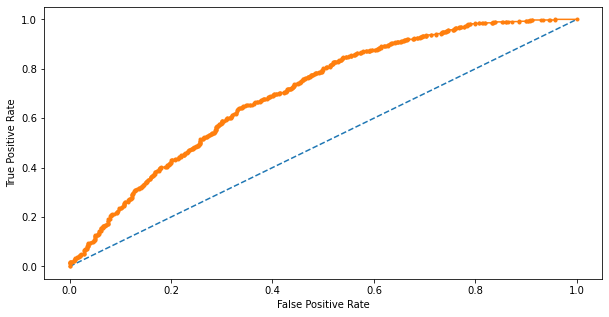

In [143]:
# calculating on the basis of a person not defaulting
# calculate AUC
auc = metrics.roc_auc_score(data2_dummy['Contraceptive_method_used_Yes'],y_prob_pred_4)
print('AUC: %.3f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(data2_dummy['Contraceptive_method_used_Yes'],y_prob_pred_4)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

The more area under the curve you have, the better - the higher the ROC AUC score. This is when the FN and FP are both at zero - or if we refer to the graph above, it’s when the true positive rate is 1 and the false positive rate is 0.

# SKlearn

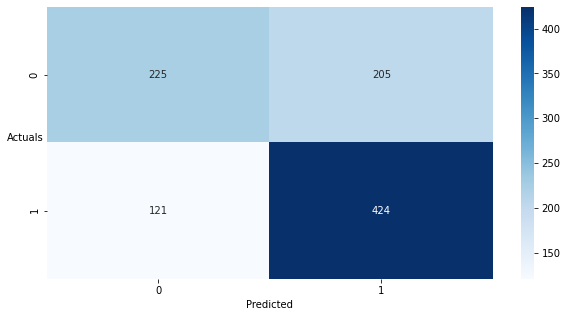

In [144]:
sns.heatmap((metrics.confusion_matrix(Train['Contraceptive_method_used_Yes'],model_sklearn_4_pred_train)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [145]:
print('Accuracy Score - Model 4')
print('Training:', metrics.accuracy_score(Train['Contraceptive_method_used_Yes'],model_sklearn_4_pred_train))
print('Testing: ', metrics.accuracy_score(Test['Contraceptive_method_used_Yes'],model_sklearn_4_pred_test))

Accuracy Score - Model 4
Training: 0.6656410256410257
Testing:  0.6578947368421053


# 2.4 Inference: Basis on these predictions, what are the insights and recommendations.

Both the wife age and number of children born have null values, which are imputed by median value

. As there is a possibility that same-age ladies have the same kind of other records, didn’t drop 85 duplicate values

. EDA with univariate, bivariate analysis are performed, along with analysis of the mean median, standard deviation, and outliers

. Later which data having string value is encoded for modelling

. started checking VIF value but as there are no variables that has more than 5 VIF, continued searching and printed the adjusted pseudo R-square value with value of 0.099

. Later on went by searching the logistics 2 with adjusted pseudo R-square value with value of 0.100 and than searched logistics 3 with function value of 0.611, adjusted pseudo R-square value with value of 0.101
